In [1]:
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import sys

In [74]:
sys.path.append('../utils')

In [75]:
from data_preparing import ChannelData, random_rotation

In [76]:
test_path = Path('../data/test_data/')
cdata = ChannelData(path=test_path, elevation='elevation')

In [77]:
cdata.add_process(random_rotation)

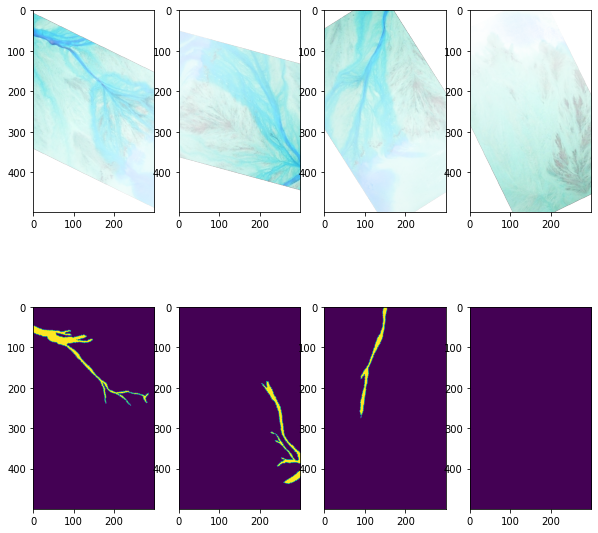

In [82]:
n_samples = 4
fig, axs = plt.subplots(nrows=2, ncols=n_samples, figsize=(10, 10))

i = 0
for image, label in cdata.data.take(n_samples):
    axs[0][i].imshow(image)
    axs[1][i].imshow(label)
    i += 1
#     plt.savefig(self.output_path / 'test_rotation.png', bbox_inches='tight')

In [107]:
image.shape

TensorShape([500, 300, 4])

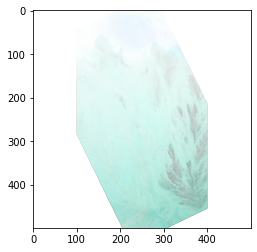

In [111]:
plt.imshow(tf.image.pad_to_bounding_box(image, 0, 100, 500, 500))

In [102]:
res = tf.keras.applications.ResNet50(include_top=False, input_shape=(500, 300, 3))

94773248/94765736 [==============================] - 2s 0us/step


In [103]:
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 506, 306, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 250, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 250, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [104]:
new_config = res.get_config()
new_config['layers'][0]['config']['batch_input_shape'] = (None, 500, 300, 4)
new_res = res.from_config(new_config)

In [105]:
new_res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500, 300, 4) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 506, 306, 4)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 250, 150, 64) 12608       conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 250, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [106]:
new_res.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [90]:
label.shape

TensorShape([500, 300, 1])

In [100]:
x, y = tf.reshape(image, (1, 500, 300, 4)), tf.convert_to_tensor([[0]])

In [101]:
new_res.fit(x, y)

InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [160,2048] and labels shape [1]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-101-7ef6f87557de>:1) ]] [Op:__inference_train_function_91000]

Function call stack:
train_function
